In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import os
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,LSTM

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import date, timedelta
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-04-01', '%Y-%m-%d')

data_path = 'D:/universidad/universidad 4/TFG/recursos para el desarrollo/datos procesados/OD'

In [2]:
delta = e_date - i_date

target_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    target_days.append(day)

In [3]:
def read_OD_fn(source_type):
    ods = {}
    for date in tqdm_notebook(target_days):
        od_date= pd.read_csv(os.path.join(data_path, 'date_{}_OD_{}.csv'.format(source_type,date.strftime('%Y-%m-%d'))), 
                            index_col=0)
        ods[date] = od_date
    return ods

In [4]:
ine_ods = read_OD_fn('INE')

  0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
twt_ods = read_OD_fn('TWT')

  0%|          | 0/81 [00:00<?, ?it/s]

# Serializar los datos

In [6]:
lista_twt1 = []
lista_twt2 = []
lista_twt3 = []
lista_twt4 = []
lista_twt5 = []

for date in tqdm_notebook(target_days):
    lista_twt1.append(twt_ods[date].loc['11CA','total'])
    lista_twt2.append(twt_ods[date].loc['33PO','total'])
    lista_twt3.append(twt_ods[date].loc['026V','total'])
    lista_twt4.append(twt_ods[date].loc['21BU','total'])
    lista_twt5.append(twt_ods[date].loc['49GI','total'])
    
    
lista_ine1 = []
lista_ine2 = []
lista_ine3 = []
lista_ine4 = []
lista_ine5 = []

for date in tqdm_notebook(target_days):
    lista_ine1.append(ine_ods[date].loc['11CA','total'])
    lista_ine2.append(ine_ods[date].loc['33PO','total'])
    lista_ine3.append(ine_ods[date].loc['026V','total'])
    lista_ine4.append(ine_ods[date].loc['21BU','total'])
    lista_ine5.append(ine_ods[date].loc['49GI','total'])
    

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
df_twt1 = pd.DataFrame (lista_twt1, columns = ['Viajes'], index= target_days)
df_ine1 = pd.DataFrame (lista_ine1, columns = ['Viajes'], index= target_days)

df_twt2 = pd.DataFrame (lista_twt2, columns = ['Viajes'], index= target_days)
df_ine2 = pd.DataFrame (lista_ine2, columns = ['Viajes'], index= target_days)

df_twt3 = pd.DataFrame (lista_twt3, columns = ['Viajes'], index= target_days)
df_ine3 = pd.DataFrame (lista_ine3, columns = ['Viajes'], index= target_days)

df_twt4 = pd.DataFrame (lista_twt4, columns = ['Viajes'], index= target_days)
df_ine4 = pd.DataFrame (lista_ine4, columns = ['Viajes'], index= target_days)

df_twt5 = pd.DataFrame (lista_twt5, columns = ['Viajes'], index= target_days)
df_ine5 = pd.DataFrame (lista_ine5, columns = ['Viajes'], index= target_days)

In [8]:
lista_twt = []
lista_ine = []

df_twt = df_twt1 + df_twt2 + df_twt3 + df_twt4 + df_twt5
df_ine = df_ine1 + df_ine2 + df_ine3 + df_ine4 + df_ine5

In [9]:
df_twt.head()

,Viajes
2020-04-01,0
2020-04-02,2
2020-04-03,0
2020-04-04,0
2020-04-05,0


In [10]:
df_ine.head()

,Viajes
2020-04-01,194
2020-04-02,183
2020-04-03,317
2020-04-04,177
2020-04-05,142


In [11]:
del twt_ods
del ine_ods

# Visualización de datos

In [12]:
print(df_twt.index.min())
print(df_ine.index.max())

2020-04-01 00:00:00
2020-06-20 00:00:00


In [13]:
print(len(df_twt['2020']))

81


In [14]:
print(len(df_ine['2020']))

81


In [15]:
df_twt.describe()

,Viajes
count,81.000000
mean,0.407407
std,0.862812
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


In [16]:
df_ine.describe()

,Viajes
count,81.000000
mean,366.592593
std,108.663446
min,110.000000
25%,303.000000
50%,390.000000
75%,433.000000
max,614.000000


In [17]:
meses = df_twt.resample('M').mean()
meses

,Viajes
2020-04-30,0.366667
2020-05-31,0.387097
2020-06-30,0.500000


In [18]:
meses = df_ine.resample('M').mean()
meses

,Viajes
2020-04-30,276.233333
2020-05-31,402.096774
2020-06-30,447.100000


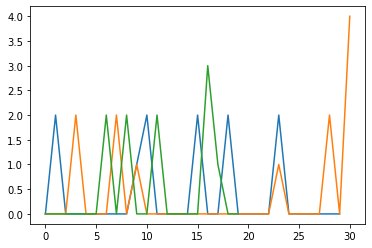

In [19]:
abril = df_twt['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_twt['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_twt['2020-06-01':'2020-06-20']
plt.plot(junio.values)

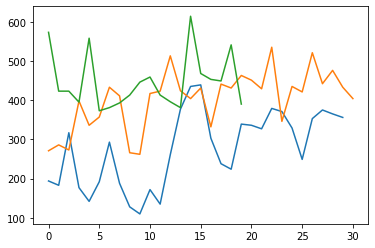

In [20]:
abril = df_ine['2020-04-01':'2020-04-30']
plt.plot(abril.values)
mayo = df_ine['2020-05-01':'2020-05-31']
plt.plot(mayo.values)
junio = df_ine['2020-06-01':'2020-06-20']
plt.plot(junio.values)

# Preprocesado de datos

In [21]:
dataset_twt = df_twt.values
dataset_twt = dataset_twt.astype('float32')

dataset_ine = df_ine.values
dataset_ine = dataset_ine.astype('float32')

In [22]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

# Dividimos los datos en sets de entrenamiento y validacion

In [23]:
#dividimos nuestros valores entre sets de entrenamiento y de test
n_train_days = 60
train_twt = dataset_twt[:n_train_days, :]
test_twt = dataset_twt[n_train_days:, :]

train_ine = dataset_ine[:n_train_days, :]
test_ine = dataset_ine[n_train_days:, :]

print(len(train_twt), len(test_twt))

60 21


In [24]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset1, dataset2, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [25]:
# dividimos en entradas y salidas
look_back = 7
trainX, trainY = create_dataset(train_twt, train_ine, look_back)
testX, testY = create_dataset(test_twt, test_ine, look_back)

print(len(trainX), len(testY))

53 14


In [26]:
print(trainX)

[[[[0.16666667 0.        ]]

  [[0.14484127 0.5       ]]

  [[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]]


 [[[0.14484127 0.5       ]]

  [[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]]


 [[[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]]


 [[[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]

  [[0.         0.25      ]]]


 [[[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]

  [[0.         0.25      ]]

  [[0.

In [27]:
print(trainY)

[0.1547619  0.03571428 0.         0.12301587 0.04960318 0.29960322
 0.52976197 0.6448413  0.65277785 0.38293654 0.25396824 0.22619049
 0.45436513 0.44841272 0.43055558 0.5337302  0.5178572  0.43452382
 0.27579367 0.48214293 0.5257937  0.5059524  0.48809528 0.31944448
 0.3492064  0.32341272 0.5714286  0.44841272 0.4900794  0.6408731
 0.59722227 0.30952382 0.30158734 0.60912704 0.6210318  0.7996032
 0.62301594 0.5833334  0.63690484 0.44047624 0.6567461  0.63690484
 0.7003969  0.67658734 0.63293654 0.84325397 0.46825403 0.6448413
 0.6170635  0.8154763  0.6587302  0.7261905  0.6408731 ]


In [28]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 2))

In [29]:
print(trainX)

[[[0.16666667 0.        ]
  [0.14484127 0.5       ]
  [0.41071433 0.        ]
  [0.13293652 0.        ]
  [0.06349207 0.        ]
  [0.16269843 0.        ]
  [0.36309528 0.        ]]

 [[0.14484127 0.5       ]
  [0.41071433 0.        ]
  [0.13293652 0.        ]
  [0.06349207 0.        ]
  [0.16269843 0.        ]
  [0.36309528 0.        ]
  [0.1547619  0.        ]]

 [[0.41071433 0.        ]
  [0.13293652 0.        ]
  [0.06349207 0.        ]
  [0.16269843 0.        ]
  [0.36309528 0.        ]
  [0.1547619  0.        ]
  [0.03571428 0.        ]]

 [[0.13293652 0.        ]
  [0.06349207 0.        ]
  [0.16269843 0.        ]
  [0.36309528 0.        ]
  [0.1547619  0.        ]
  [0.03571428 0.        ]
  [0.         0.25      ]]

 [[0.06349207 0.        ]
  [0.16269843 0.        ]
  [0.36309528 0.        ]
  [0.1547619  0.        ]
  [0.03571428 0.        ]
  [0.         0.25      ]
  [0.12301587 0.5       ]]

 [[0.16269843 0.        ]
  [0.36309528 0.        ]
  [0.1547619  0.        ]
  

In [30]:
print(trainY)

[0.1547619  0.03571428 0.         0.12301587 0.04960318 0.29960322
 0.52976197 0.6448413  0.65277785 0.38293654 0.25396824 0.22619049
 0.45436513 0.44841272 0.43055558 0.5337302  0.5178572  0.43452382
 0.27579367 0.48214293 0.5257937  0.5059524  0.48809528 0.31944448
 0.3492064  0.32341272 0.5714286  0.44841272 0.4900794  0.6408731
 0.59722227 0.30952382 0.30158734 0.60912704 0.6210318  0.7996032
 0.62301594 0.5833334  0.63690484 0.44047624 0.6567461  0.63690484
 0.7003969  0.67658734 0.63293654 0.84325397 0.46825403 0.6448413
 0.6170635  0.8154763  0.6587302  0.7261905  0.6408731 ]


# Creamos la red neuronal

In [31]:
def crear_modeloFF():
    model = Sequential() 
    model.add(LSTM(20, input_shape=(look_back,2), return_sequences=True))
    model.add(LSTM(50, input_shape=(look_back,2), return_sequences=True))
    model.add(Dropout(0.30))
    model.add(LSTM(100, input_shape=(look_back,2)))
    model.add(Dropout(0.30))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

In [32]:
model = crear_modeloFF()

history=model.fit(trainX, trainY, epochs=200, validation_data=(testX,testY), batch_size=1, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 20)             1840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
____________________________________________________

Epoch 123/200
53/53 - 0s - loss: 0.0125 - val_loss: 0.0179
Epoch 124/200
53/53 - 0s - loss: 0.0091 - val_loss: 0.0215
Epoch 125/200
53/53 - 0s - loss: 0.0109 - val_loss: 0.0186
Epoch 126/200
53/53 - 0s - loss: 0.0106 - val_loss: 0.0201
Epoch 127/200
53/53 - 0s - loss: 0.0086 - val_loss: 0.0192
Epoch 128/200
53/53 - 0s - loss: 0.0106 - val_loss: 0.0189
Epoch 129/200
53/53 - 0s - loss: 0.0102 - val_loss: 0.0190
Epoch 130/200
53/53 - 0s - loss: 0.0098 - val_loss: 0.0198
Epoch 131/200
53/53 - 0s - loss: 0.0099 - val_loss: 0.0207
Epoch 132/200
53/53 - 0s - loss: 0.0085 - val_loss: 0.0221
Epoch 133/200
53/53 - 0s - loss: 0.0086 - val_loss: 0.0195
Epoch 134/200
53/53 - 0s - loss: 0.0096 - val_loss: 0.0228
Epoch 135/200
53/53 - 0s - loss: 0.0076 - val_loss: 0.0234
Epoch 136/200
53/53 - 0s - loss: 0.0104 - val_loss: 0.0214
Epoch 137/200
53/53 - 0s - loss: 0.0106 - val_loss: 0.0215
Epoch 138/200
53/53 - 0s - loss: 0.0102 - val_loss: 0.0247
Epoch 139/200
53/53 - 0s - loss: 0.0085 - val_loss: 0.02

# Visualizamos resultados

In [33]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


def compute_metrics_fn(y_valid_resc, y_hat_resc):
    mae_ = mean_absolute_error(y_valid_resc, y_hat_resc)
    mse_ = mean_squared_error(y_valid_resc, y_hat_resc)
    rmse_ = mean_squared_error(y_valid_resc, y_hat_resc, squared = False)
    cvrmse_ = rmse_/np.mean(y_valid_resc)*100 # it is a percentage
    mape_ = mape(y_valid_resc, y_hat_resc)
    
    return mae_, mse_, rmse_, cvrmse_, mape_

In [34]:
# hacemos las predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY_scalerInverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_scalerInverse = scaler.inverse_transform([testY])

In [35]:
# calculamos las metricas de error
trainScore_MAE, trainScore_MSE, trainScore_RMSE, trainScore_CVRMSE, trainScore_MAPE  =  compute_metrics_fn(trainY_scalerInverse[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore_MAE))
print('Resultado del entrenamiento: %.2f MSE' % (trainScore_MSE))
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore_RMSE))
print('Resultado del entrenamiento: %.2f CVRMSE' % (trainScore_CVRMSE))
print('Resultado del entrenamiento: %.2f MAPE \n' % (trainScore_MAPE))

testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(testY_scalerInverse[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del entrenamiento: 28.10 MAE
Resultado del entrenamiento: 1339.11 MSE
Resultado del entrenamiento: 36.59 RMSE
Resultado del entrenamiento: 10.29 CVRMSE
Resultado del entrenamiento: 9.73 MAPE 

Resultado del test: 65.98 MAE
Resultado del test: 8682.83 MSE
Resultado del test: 93.18 RMSE
Resultado del test: 21.05 CVRMSE
Resultado del test: 13.89 MAPE


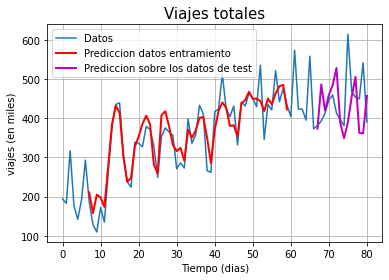

In [36]:
# predicciones del entrenamiento de cambio para plotear
trainPredictPlot = np.empty_like(dataset_ine)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# predicciones del test de cambio para plotear
testPredictPlot = np.empty_like(dataset_ine)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_ine), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_ine))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'m', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion sobre los datos de test'), loc = 'upper left')
plt.grid(True)
plt.title("Viajes totales", fontsize = 15)
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

In [37]:
results=testPredict
print(len(results))

14


In [38]:
test = testY_scalerInverse[0]

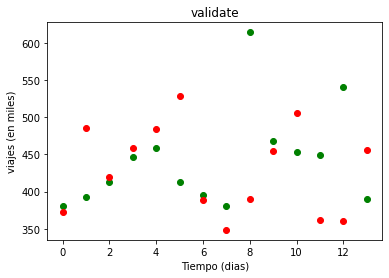

In [39]:
plt.scatter(range(len(test)),test,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.show()

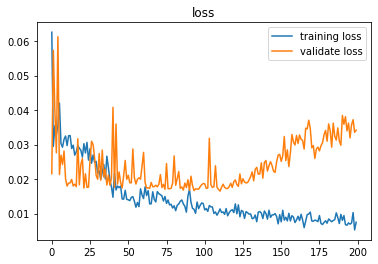

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend( ('training loss', 'validate loss'), loc = 'upper right')
plt.show()

In [41]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

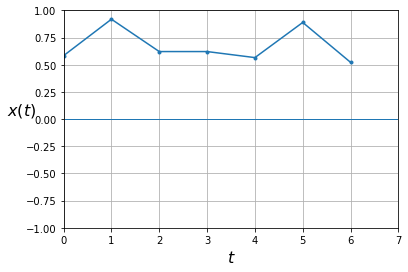

In [42]:
n_steps = 6
plot_series(testX[0, :, 0], testY_scalerInverse[0, 0], testPredict[0, 0])
plt.show()

# Exportar los datos

In [43]:
e_date = datetime.datetime.strptime('2020-06-20', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-06-07', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(testPredict, index= index_days)
prediccion.columns = ['valor predicho']

prediccion

,valor predicho
2020-06-07,373.000946
2020-06-08,485.967010
2020-06-09,419.620514
2020-06-10,458.699127
2020-06-11,484.292755
2020-06-12,528.103088
2020-06-13,388.501068
2020-06-14,348.605286
2020-06-15,389.495972
2020-06-16,454.918518


In [44]:
datosReales = df_ine['2020-6-07':'2020-6-20']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']

compara

,real,prediccion
2020-06-07,381,373.000946
2020-06-08,393,485.967010
2020-06-09,413,419.620514
2020-06-10,446,458.699127
2020-06-11,459,484.292755
2020-06-12,413,528.103088
2020-06-13,396,388.501068
2020-06-14,381,348.605286
2020-06-15,614,389.495972
2020-06-16,468,454.918518


In [45]:
compara.to_excel('Resultados INE - TWT.xlsx', columns=['real', 'prediccion'])

# Prediccion a futuro

In [46]:
# usaremos 7 dias que poseemos para predecir los 7 dias siguientes tras esto compararemos los resultados con los que
# poseemos para ver el grado de error

Dias_twt = df_twt['2020-5-25':'2020-5-31']
Dias_ine = df_ine['2020-5-25':'2020-5-31']

In [47]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos, en este caso modificada para ayudarnos a crear
#los distintos sets de entrenmiento para distintos modelos que predeciran 1 dia cada uno

def create_dataset2(dataset1, dataset2, look_back=1, dias=0):
  dataX, dataY = [], []
  for i in range(len(dataset2)-look_back-dias):
    a = []
    for x in range(look_back):
        a.append(dataset2[i+x])  
        a.append(dataset1[i+x])
    a = np.array(a)
    a = np.reshape(a, (7, 1, 2))
    dataX.append(a)
    dataY.append(dataset2[i + look_back + dias, 0])
  return np.array(dataX), np.array(dataY)

In [48]:
#ahora crearemos los sets para entrenar los modelos
look_back = 7

trainX1, trainY1 = create_dataset2(train_twt, train_ine, look_back, 1)
testX1, testY1 = create_dataset2(test_twt, test_ine, look_back, 1)

trainX2, trainY2 = create_dataset2(train_twt, train_ine, look_back, 2)
testX2, testY2 = create_dataset2(test_twt, test_ine, look_back, 2)

trainX3, trainY3 = create_dataset2(train_twt, train_ine, look_back, 3)
testX3, testY3 = create_dataset2(test_twt, test_ine, look_back, 3)

trainX4, trainY4 = create_dataset2(train_twt, train_ine, look_back, 4)
testX4, testY4 = create_dataset2(test_twt, test_ine, look_back, 4)

trainX5, trainY5 = create_dataset2(train_twt, train_ine, look_back, 5)
testX5, testY5 = create_dataset2(test_twt, test_ine, look_back, 5)

trainX6, trainY6 = create_dataset2(train_twt, train_ine, look_back, 6)
testX6, testY6 = create_dataset2(test_twt, test_ine, look_back, 6)

In [49]:
print(trainX1)

[[[[0.16666667 0.        ]]

  [[0.14484127 0.5       ]]

  [[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]]


 [[[0.14484127 0.5       ]]

  [[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]]


 [[[0.41071433 0.        ]]

  [[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]]


 [[[0.13293652 0.        ]]

  [[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]

  [[0.         0.25      ]]]


 [[[0.06349207 0.        ]]

  [[0.16269843 0.        ]]

  [[0.36309528 0.        ]]

  [[0.1547619  0.        ]]

  [[0.03571428 0.        ]]

  [[0.         0.25      ]]

  [[0.

In [50]:
print(trainY1)

[0.03571428 0.         0.12301587 0.04960318 0.29960322 0.52976197
 0.6448413  0.65277785 0.38293654 0.25396824 0.22619049 0.45436513
 0.44841272 0.43055558 0.5337302  0.5178572  0.43452382 0.27579367
 0.48214293 0.5257937  0.5059524  0.48809528 0.31944448 0.3492064
 0.32341272 0.5714286  0.44841272 0.4900794  0.6408731  0.59722227
 0.30952382 0.30158734 0.60912704 0.6210318  0.7996032  0.62301594
 0.5833334  0.63690484 0.44047624 0.6567461  0.63690484 0.7003969
 0.67658734 0.63293654 0.84325397 0.46825403 0.6448413  0.6170635
 0.8154763  0.6587302  0.7261905  0.6408731 ]


In [51]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]

trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 2))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 2))

trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 2))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 2))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 2))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 2))

trainX4 = np.reshape(trainX4, (trainX4.shape[0], trainX4.shape[1], 2))
testX4 = np.reshape(testX4, (testX4.shape[0], testX4.shape[1], 2))

trainX5 = np.reshape(trainX5, (trainX5.shape[0], trainX5.shape[1], 2))
testX5 = np.reshape(testX5, (testX5.shape[0], testX5.shape[1], 2))

trainX6 = np.reshape(trainX6, (trainX6.shape[0], trainX6.shape[1], 2))
testX6 = np.reshape(testX6, (testX6.shape[0], testX6.shape[1], 2))

In [52]:
#creamos los distintos modelos para predecir cada dia

model1 = crear_modeloFF()
history=model1.fit(trainX1, trainY1, epochs=200, validation_data=(testX1,testY1), batch_size=1, verbose=2)

model2 = crear_modeloFF()
history=model2.fit(trainX2, trainY2, epochs=200, validation_data=(testX2,testY2), batch_size=1, verbose=2)

model3 = crear_modeloFF()
history=model3.fit(trainX3, trainY3, epochs=200, validation_data=(testX3,testY3), batch_size=1, verbose=2)

model4 = crear_modeloFF()
history=model4.fit(trainX4, trainY4, epochs=200, validation_data=(testX4,testY4), batch_size=1, verbose=2)

model5 = crear_modeloFF()
history=model5.fit(trainX5, trainY5, epochs=200, validation_data=(testX5,testY5), batch_size=1, verbose=2)

model6 = crear_modeloFF()
history=model6.fit(trainX6, trainY6, epochs=200, validation_data=(testX6,testY6), batch_size=1, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 20)             1840      
_________________________________________________________________
lstm_4 (LSTM)                (None, 7, 50)             14200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 76,541
Trainable params: 76,541
Non-trainable params: 0
__________________________________________________

52/52 - 0s - loss: 0.0099 - val_loss: 0.0177
Epoch 123/200
52/52 - 0s - loss: 0.0090 - val_loss: 0.0195
Epoch 124/200
52/52 - 0s - loss: 0.0125 - val_loss: 0.0185
Epoch 125/200
52/52 - 0s - loss: 0.0091 - val_loss: 0.0175
Epoch 126/200
52/52 - 0s - loss: 0.0093 - val_loss: 0.0189
Epoch 127/200
52/52 - 0s - loss: 0.0115 - val_loss: 0.0179
Epoch 128/200
52/52 - 0s - loss: 0.0095 - val_loss: 0.0234
Epoch 129/200
52/52 - 0s - loss: 0.0111 - val_loss: 0.0181
Epoch 130/200
52/52 - 0s - loss: 0.0093 - val_loss: 0.0190
Epoch 131/200
52/52 - 0s - loss: 0.0089 - val_loss: 0.0176
Epoch 132/200
52/52 - 0s - loss: 0.0108 - val_loss: 0.0197
Epoch 133/200
52/52 - 0s - loss: 0.0083 - val_loss: 0.0203
Epoch 134/200
52/52 - 0s - loss: 0.0102 - val_loss: 0.0190
Epoch 135/200
52/52 - 0s - loss: 0.0107 - val_loss: 0.0183
Epoch 136/200
52/52 - 0s - loss: 0.0084 - val_loss: 0.0203
Epoch 137/200
52/52 - 0s - loss: 0.0104 - val_loss: 0.0191
Epoch 138/200
52/52 - 0s - loss: 0.0097 - val_loss: 0.0177
Epoch 139/2

Epoch 43/200
51/51 - 0s - loss: 0.0177 - val_loss: 0.0345
Epoch 44/200
51/51 - 0s - loss: 0.0168 - val_loss: 0.0284
Epoch 45/200
51/51 - 0s - loss: 0.0136 - val_loss: 0.0414
Epoch 46/200
51/51 - 0s - loss: 0.0143 - val_loss: 0.0321
Epoch 47/200
51/51 - 0s - loss: 0.0160 - val_loss: 0.0326
Epoch 48/200
51/51 - 0s - loss: 0.0160 - val_loss: 0.0269
Epoch 49/200
51/51 - 0s - loss: 0.0113 - val_loss: 0.0304
Epoch 50/200
51/51 - 0s - loss: 0.0124 - val_loss: 0.0353
Epoch 51/200
51/51 - 0s - loss: 0.0170 - val_loss: 0.0299
Epoch 52/200
51/51 - 0s - loss: 0.0132 - val_loss: 0.0296
Epoch 53/200
51/51 - 0s - loss: 0.0156 - val_loss: 0.0254
Epoch 54/200
51/51 - 0s - loss: 0.0146 - val_loss: 0.0250
Epoch 55/200
51/51 - 0s - loss: 0.0115 - val_loss: 0.0233
Epoch 56/200
51/51 - 0s - loss: 0.0126 - val_loss: 0.0222
Epoch 57/200
51/51 - 0s - loss: 0.0117 - val_loss: 0.0226
Epoch 58/200
51/51 - 0s - loss: 0.0096 - val_loss: 0.0233
Epoch 59/200
51/51 - 0s - loss: 0.0123 - val_loss: 0.0340
Epoch 60/200
5

Epoch 183/200
51/51 - 0s - loss: 0.0061 - val_loss: 0.0203
Epoch 184/200
51/51 - 0s - loss: 0.0074 - val_loss: 0.0233
Epoch 185/200
51/51 - 0s - loss: 0.0081 - val_loss: 0.0250
Epoch 186/200
51/51 - 0s - loss: 0.0077 - val_loss: 0.0214
Epoch 187/200
51/51 - 0s - loss: 0.0066 - val_loss: 0.0206
Epoch 188/200
51/51 - 0s - loss: 0.0084 - val_loss: 0.0199
Epoch 189/200
51/51 - 0s - loss: 0.0075 - val_loss: 0.0203
Epoch 190/200
51/51 - 0s - loss: 0.0064 - val_loss: 0.0198
Epoch 191/200
51/51 - 0s - loss: 0.0064 - val_loss: 0.0219
Epoch 192/200
51/51 - 0s - loss: 0.0068 - val_loss: 0.0219
Epoch 193/200
51/51 - 0s - loss: 0.0057 - val_loss: 0.0236
Epoch 194/200
51/51 - 0s - loss: 0.0073 - val_loss: 0.0219
Epoch 195/200
51/51 - 1s - loss: 0.0047 - val_loss: 0.0260
Epoch 196/200
51/51 - 0s - loss: 0.0054 - val_loss: 0.0220
Epoch 197/200
51/51 - 0s - loss: 0.0055 - val_loss: 0.0222
Epoch 198/200
51/51 - 0s - loss: 0.0059 - val_loss: 0.0224
Epoch 199/200
51/51 - 0s - loss: 0.0056 - val_loss: 0.02

50/50 - 0s - loss: 0.0102 - val_loss: 0.0204
Epoch 105/200
50/50 - 0s - loss: 0.0116 - val_loss: 0.0231
Epoch 106/200
50/50 - 0s - loss: 0.0113 - val_loss: 0.0234
Epoch 107/200
50/50 - 0s - loss: 0.0114 - val_loss: 0.0236
Epoch 108/200
50/50 - 0s - loss: 0.0123 - val_loss: 0.0205
Epoch 109/200
50/50 - 0s - loss: 0.0110 - val_loss: 0.0231
Epoch 110/200
50/50 - 0s - loss: 0.0124 - val_loss: 0.0224
Epoch 111/200
50/50 - 0s - loss: 0.0120 - val_loss: 0.0203
Epoch 112/200
50/50 - 0s - loss: 0.0120 - val_loss: 0.0254
Epoch 113/200
50/50 - 0s - loss: 0.0113 - val_loss: 0.0217
Epoch 114/200
50/50 - 0s - loss: 0.0116 - val_loss: 0.0226
Epoch 115/200
50/50 - 0s - loss: 0.0117 - val_loss: 0.0233
Epoch 116/200
50/50 - 0s - loss: 0.0119 - val_loss: 0.0196
Epoch 117/200
50/50 - 0s - loss: 0.0098 - val_loss: 0.0199
Epoch 118/200
50/50 - 0s - loss: 0.0102 - val_loss: 0.0206
Epoch 119/200
50/50 - 0s - loss: 0.0124 - val_loss: 0.0204
Epoch 120/200
50/50 - 0s - loss: 0.0126 - val_loss: 0.0204
Epoch 121/2

49/49 - 0s - loss: 0.0181 - val_loss: 0.0329
Epoch 25/200
49/49 - 0s - loss: 0.0242 - val_loss: 0.0519
Epoch 26/200
49/49 - 0s - loss: 0.0206 - val_loss: 0.0383
Epoch 27/200
49/49 - 0s - loss: 0.0200 - val_loss: 0.0302
Epoch 28/200
49/49 - 0s - loss: 0.0278 - val_loss: 0.0369
Epoch 29/200
49/49 - 0s - loss: 0.0220 - val_loss: 0.0478
Epoch 30/200
49/49 - 0s - loss: 0.0235 - val_loss: 0.0319
Epoch 31/200
49/49 - 0s - loss: 0.0238 - val_loss: 0.0347
Epoch 32/200
49/49 - 0s - loss: 0.0232 - val_loss: 0.0262
Epoch 33/200
49/49 - 0s - loss: 0.0219 - val_loss: 0.0504
Epoch 34/200
49/49 - 0s - loss: 0.0204 - val_loss: 0.0299
Epoch 35/200
49/49 - 0s - loss: 0.0225 - val_loss: 0.0510
Epoch 36/200
49/49 - 0s - loss: 0.0198 - val_loss: 0.0431
Epoch 37/200
49/49 - 0s - loss: 0.0213 - val_loss: 0.0343
Epoch 38/200
49/49 - 0s - loss: 0.0247 - val_loss: 0.0451
Epoch 39/200
49/49 - 0s - loss: 0.0209 - val_loss: 0.0441
Epoch 40/200
49/49 - 0s - loss: 0.0219 - val_loss: 0.0300
Epoch 41/200
49/49 - 0s - l

Epoch 165/200
49/49 - 0s - loss: 0.0123 - val_loss: 0.0324
Epoch 166/200
49/49 - 0s - loss: 0.0095 - val_loss: 0.0283
Epoch 167/200
49/49 - 0s - loss: 0.0103 - val_loss: 0.0245
Epoch 168/200
49/49 - 0s - loss: 0.0096 - val_loss: 0.0299
Epoch 169/200
49/49 - 0s - loss: 0.0091 - val_loss: 0.0250
Epoch 170/200
49/49 - 0s - loss: 0.0104 - val_loss: 0.0244
Epoch 171/200
49/49 - 0s - loss: 0.0087 - val_loss: 0.0248
Epoch 172/200
49/49 - 0s - loss: 0.0124 - val_loss: 0.0249
Epoch 173/200
49/49 - 0s - loss: 0.0117 - val_loss: 0.0299
Epoch 174/200
49/49 - 0s - loss: 0.0107 - val_loss: 0.0263
Epoch 175/200
49/49 - 0s - loss: 0.0118 - val_loss: 0.0242
Epoch 176/200
49/49 - 0s - loss: 0.0101 - val_loss: 0.0267
Epoch 177/200
49/49 - 0s - loss: 0.0110 - val_loss: 0.0278
Epoch 178/200
49/49 - 0s - loss: 0.0112 - val_loss: 0.0240
Epoch 179/200
49/49 - 0s - loss: 0.0092 - val_loss: 0.0282
Epoch 180/200
49/49 - 0s - loss: 0.0125 - val_loss: 0.0268
Epoch 181/200
49/49 - 0s - loss: 0.0094 - val_loss: 0.02

Epoch 86/200
48/48 - 0s - loss: 0.0147 - val_loss: 0.0417
Epoch 87/200
48/48 - 0s - loss: 0.0163 - val_loss: 0.0475
Epoch 88/200
48/48 - 0s - loss: 0.0139 - val_loss: 0.0585
Epoch 89/200
48/48 - 0s - loss: 0.0149 - val_loss: 0.0588
Epoch 90/200
48/48 - 0s - loss: 0.0142 - val_loss: 0.0627
Epoch 91/200
48/48 - 0s - loss: 0.0146 - val_loss: 0.0603
Epoch 92/200
48/48 - 0s - loss: 0.0145 - val_loss: 0.0451
Epoch 93/200
48/48 - 0s - loss: 0.0190 - val_loss: 0.0546
Epoch 94/200
48/48 - 0s - loss: 0.0165 - val_loss: 0.0423
Epoch 95/200
48/48 - 0s - loss: 0.0123 - val_loss: 0.0658
Epoch 96/200
48/48 - 0s - loss: 0.0166 - val_loss: 0.0488
Epoch 97/200
48/48 - 0s - loss: 0.0155 - val_loss: 0.0511
Epoch 98/200
48/48 - 0s - loss: 0.0167 - val_loss: 0.0584
Epoch 99/200
48/48 - 0s - loss: 0.0141 - val_loss: 0.0528
Epoch 100/200
48/48 - 0s - loss: 0.0143 - val_loss: 0.0573
Epoch 101/200
48/48 - 0s - loss: 0.0154 - val_loss: 0.0370
Epoch 102/200
48/48 - 0s - loss: 0.0186 - val_loss: 0.0505
Epoch 103/2

Epoch 6/200
47/47 - 0s - loss: 0.0238 - val_loss: 0.0375
Epoch 7/200
47/47 - 0s - loss: 0.0234 - val_loss: 0.0265
Epoch 8/200
47/47 - 0s - loss: 0.0235 - val_loss: 0.0271
Epoch 9/200
47/47 - 0s - loss: 0.0269 - val_loss: 0.0327
Epoch 10/200
47/47 - 0s - loss: 0.0239 - val_loss: 0.0335
Epoch 11/200
47/47 - 0s - loss: 0.0216 - val_loss: 0.0506
Epoch 12/200
47/47 - 0s - loss: 0.0234 - val_loss: 0.0281
Epoch 13/200
47/47 - 0s - loss: 0.0227 - val_loss: 0.0387
Epoch 14/200
47/47 - 0s - loss: 0.0244 - val_loss: 0.0284
Epoch 15/200
47/47 - 0s - loss: 0.0260 - val_loss: 0.0289
Epoch 16/200
47/47 - 0s - loss: 0.0297 - val_loss: 0.0503
Epoch 17/200
47/47 - 0s - loss: 0.0251 - val_loss: 0.0468
Epoch 18/200
47/47 - 0s - loss: 0.0241 - val_loss: 0.0362
Epoch 19/200
47/47 - 0s - loss: 0.0212 - val_loss: 0.0314
Epoch 20/200
47/47 - 0s - loss: 0.0200 - val_loss: 0.0428
Epoch 21/200
47/47 - 0s - loss: 0.0249 - val_loss: 0.0359
Epoch 22/200
47/47 - 0s - loss: 0.0210 - val_loss: 0.0600
Epoch 23/200
47/47

Epoch 147/200
47/47 - 0s - loss: 0.0126 - val_loss: 0.0285
Epoch 148/200
47/47 - 0s - loss: 0.0125 - val_loss: 0.0294
Epoch 149/200
47/47 - 0s - loss: 0.0098 - val_loss: 0.0230
Epoch 150/200
47/47 - 0s - loss: 0.0128 - val_loss: 0.0237
Epoch 151/200
47/47 - 0s - loss: 0.0123 - val_loss: 0.0276
Epoch 152/200
47/47 - 0s - loss: 0.0110 - val_loss: 0.0261
Epoch 153/200
47/47 - 0s - loss: 0.0117 - val_loss: 0.0284
Epoch 154/200
47/47 - 0s - loss: 0.0115 - val_loss: 0.0331
Epoch 155/200
47/47 - 0s - loss: 0.0086 - val_loss: 0.0292
Epoch 156/200
47/47 - 0s - loss: 0.0116 - val_loss: 0.0290
Epoch 157/200
47/47 - 0s - loss: 0.0099 - val_loss: 0.0243
Epoch 158/200
47/47 - 0s - loss: 0.0098 - val_loss: 0.0277
Epoch 159/200
47/47 - 0s - loss: 0.0093 - val_loss: 0.0309
Epoch 160/200
47/47 - 0s - loss: 0.0104 - val_loss: 0.0228
Epoch 161/200
47/47 - 0s - loss: 0.0098 - val_loss: 0.0292
Epoch 162/200
47/47 - 0s - loss: 0.0086 - val_loss: 0.0226
Epoch 163/200
47/47 - 0s - loss: 0.0105 - val_loss: 0.02

# Preparamos los datos para el test

In [53]:
# cargamos el dataframe en la variable dataset
dataset_twt = Dias_twt.values
dataset_ine = Dias_ine.values

# convertimos los enteros en floats
dataset_twt = dataset_twt.astype('float32')
dataset_ine = dataset_ine.astype('float32')

# normalizamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_twt = scaler.fit_transform(dataset_twt)
dataset_ine = scaler.fit_transform(dataset_ine)

In [54]:
# funcion para convertir un array de valores en una matriz de conjuntos de datos
def create_dataset3(dataset1, dataset2):
  dataX = []
  for x in range(len(dataset2)):
    dataX.append(dataset2[x])  
    dataX.append(dataset1[x])
  dataX = np.array(dataX)
  dataX = np.reshape(dataX, (7, 1, 2))
  return np.array(dataX)

In [55]:
# usamos la funcion definida previamente para crear el dataset
testX = create_dataset3(dataset_twt, dataset_ine)

In [56]:
#remodelamos los datos
testX = np.reshape(testX, (1, 7, 2))

# Realizamos la prediccion 

In [57]:
results = []

parcial=model.predict(testX)
results.append(parcial[0])

parcial=model1.predict(testX)
results.append(parcial[0])

parcial=model2.predict(testX)
results.append(parcial[0])

parcial=model3.predict(testX)
results.append(parcial[0])

parcial=model4.predict(testX)
results.append(parcial[0])

parcial=model5.predict(testX)
results.append(parcial[0])

parcial=model6.predict(testX)
results.append(parcial[0])

results = np.reshape(results, (7, 1))
print(results)

[[ 0.22774161]
 [ 0.49542677]
 [ 0.6747767 ]
 [ 0.6531207 ]
 [ 0.53328955]
 [ 0.28119236]
 [-0.01013732]]


# Re-Convertimos los resultados

In [58]:
inverted = scaler.inverse_transform(results)

#en nuestro problema no tienen sentido los decimales pues no se pueden hacer 0.5 viajes o 0.25 viajes
inverted = inverted.round()
inverted = inverted.astype(int)

inverted

array([[431],
       [462],
       [483],
       [480],
       [466],
       [437],
       [403]])

# Visualizamos el pronostico

<AxesSubplot:>

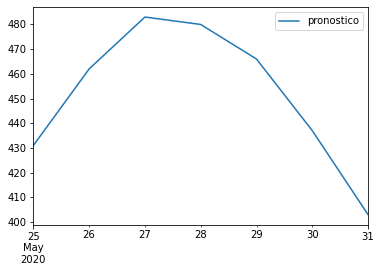

In [59]:
e_date = datetime.datetime.strptime('2020-05-31', '%Y-%m-%d')
i_date = datetime.datetime.strptime('2020-05-25', '%Y-%m-%d')
delta = e_date - i_date

index_days = []
for i in range(delta.days + 1):
    day = i_date + timedelta(days=i)
    index_days.append(day)

prediccion = pd.DataFrame(inverted, index= index_days)
prediccion.columns = ['pronostico']
prediccion.plot()

In [60]:
datosReales = df_ine['2020-5-25':'2020-5-31']

compara = pd.concat([datosReales, prediccion], axis=1)
compara.columns = ['real', 'prediccion']
compara

,real,prediccion
2020-05-25,435,431
2020-05-26,421,462
2020-05-27,521,483
2020-05-28,442,480
2020-05-29,476,466
2020-05-30,433,437
2020-05-31,404,403


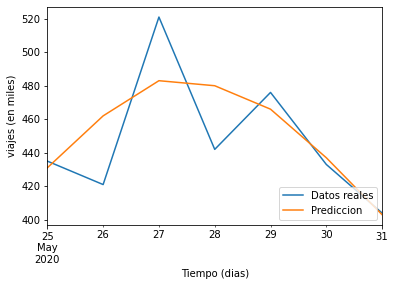

In [61]:
compara['real'].plot()
compara['prediccion'].plot()
plt.xlabel("Tiempo (dias)", fontsize = 10)
plt.ylabel("viajes (en miles)", fontsize = 10)
plt.legend( ('Datos reales', 'Prediccion'), loc = 'lower right')

In [62]:
# calculamos las metricas de error
testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion, datosReales)
print('Resultado del test: %.2f MAE' % (testScore_MAE))
print('Resultado del test: %.2f MSE' % (testScore_MSE))
print('Resultado del test: %.2f RMSE' % (testScore_RMSE))
print('Resultado del test: %.2f CVRMSE' % (testScore_CVRMSE))
print('Resultado del test: %.2f MAPE' % (testScore_MAPE))

Resultado del test: 19.43 MAE
Resultado del test: 671.71 MSE
Resultado del test: 25.92 RMSE
Resultado del test: 5.74 CVRMSE
Resultado del test: 4.13 MAPE


In [63]:
# calculamos las metricas de error para cada dia por separado
for i in range(7):
    testScore_MAE, testScore_MSE, testScore_RMSE, testScore_CVRMSE, testScore_MAPE  =  compute_metrics_fn(prediccion.values[i], datosReales.values[i])
    day = i + 1
    print('Resultado del test dia %d: %.2f MAE' % (day, testScore_MAE))
    print('Resultado del test dia %d: %.2f MSE' % (day, testScore_MSE))
    print('Resultado del test dia %d: %.2f RMSE' % (day, testScore_RMSE))
    print('Resultado del test dia %d: %.2f CVRMSE' % (day, testScore_CVRMSE))
    print('Resultado del test dia %d: %.2f MAPE \n' % (day, testScore_MAPE))

Resultado del test dia 1: 4.00 MAE
Resultado del test dia 1: 16.00 MSE
Resultado del test dia 1: 4.00 RMSE
Resultado del test dia 1: 0.93 CVRMSE
Resultado del test dia 1: 0.93 MAPE 

Resultado del test dia 2: 41.00 MAE
Resultado del test dia 2: 1681.00 MSE
Resultado del test dia 2: 41.00 RMSE
Resultado del test dia 2: 8.87 CVRMSE
Resultado del test dia 2: 8.87 MAPE 

Resultado del test dia 3: 38.00 MAE
Resultado del test dia 3: 1444.00 MSE
Resultado del test dia 3: 38.00 RMSE
Resultado del test dia 3: 7.87 CVRMSE
Resultado del test dia 3: 7.87 MAPE 

Resultado del test dia 4: 38.00 MAE
Resultado del test dia 4: 1444.00 MSE
Resultado del test dia 4: 38.00 RMSE
Resultado del test dia 4: 7.92 CVRMSE
Resultado del test dia 4: 7.92 MAPE 

Resultado del test dia 5: 10.00 MAE
Resultado del test dia 5: 100.00 MSE
Resultado del test dia 5: 10.00 RMSE
Resultado del test dia 5: 2.15 CVRMSE
Resultado del test dia 5: 2.15 MAPE 

Resultado del test dia 6: 4.00 MAE
Resultado del test dia 6: 16.00 MSE